In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [16]:
# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
# Perform PCA with all components on standardized data
pca_full = PCA(n_components=X_scaled.shape[1])
X_pca_full = pca_full.fit_transform(X_scaled)



In [25]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
print(cumulative_variance)

[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]


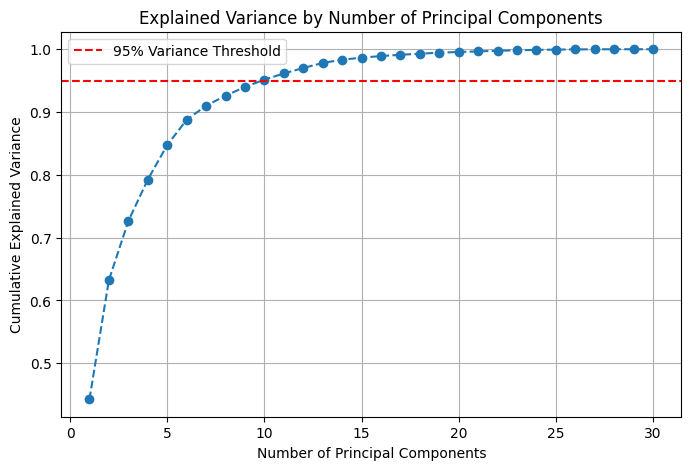

In [19]:

# Plot the cumulative explained variance (scree plot)
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, X_scaled.shape[1] + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# Determine the optimal number of components (first component that reaches 95% variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of principal components (>=95% variance):", optimal_components)


Optimal number of principal components (>=95% variance): 10


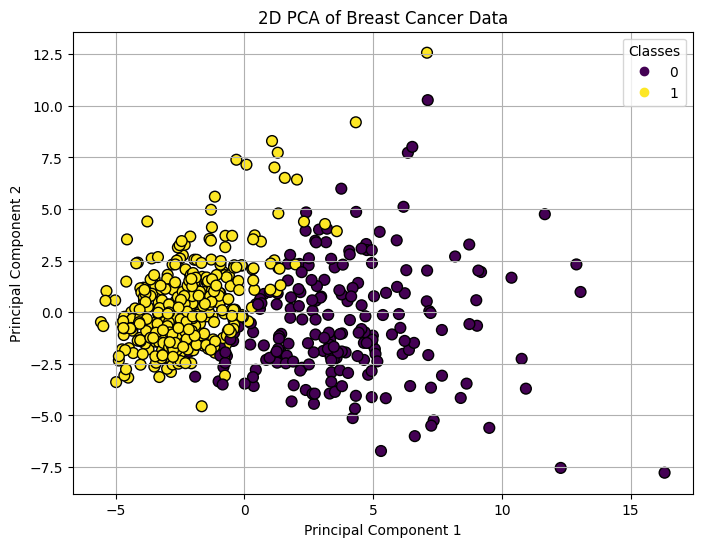

In [21]:

# Reduce the standardized data to 2 principal components for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolor='k', s=60)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Breast Cancer Data')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()


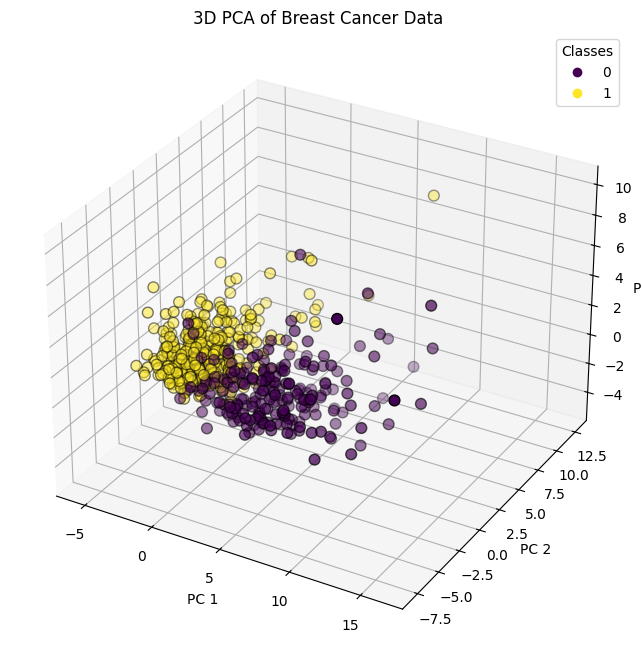

In [22]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Reduce the standardized data to 3 principal components for 3D visualization
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=y, cmap='viridis', edgecolor='k', s=60)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
ax.set_title('3D PCA of Breast Cancer Data')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()
